Notebook for plotting time series of following diagnostics:
Sea ice extent
Sea ice area
Mean sea ice thickness
Mean snow thickenss

Mean sea ice thickness and mean snow thickness are computed North of 80 degrees

In [2]:
import sys
sys.path.append("../")

import xarray as xr
import musevice as mv
import dask
from dask import diagnostics
import jinja2
import datetime
import numpy as np
import matplotlib
import matplotlib.pyplot as plt


In [4]:
files_out = "/work/oda/fc09621/EXPS/CMCC-OM/test_chiaramesh/longrun_chiaramesh.ice_UGRID_c*.nc"
file_area = "/work/oda/fc09621/EXPS/CMCC-OM/compute_area/computearea.nc"
file_grid = "/work/oda/cg30921/mesh_gen/pos1_latitudinal/ugloblat2_noNP.bas.nc"

ds = xr.open_mfdataset(files_out)#, concat_dim="time_counter")
ds_area = xr.open_mfdataset(file_area)
ds_grid = xr.open_mfdataset(file_grid)

# Add area of control volume to the grid dataset 
ds_grid = ds_grid.assign(area=ds_area.area_controlvolume)


In [5]:
sie_plot = mv.sea_ice_extent(ds, ds_grid, "n")

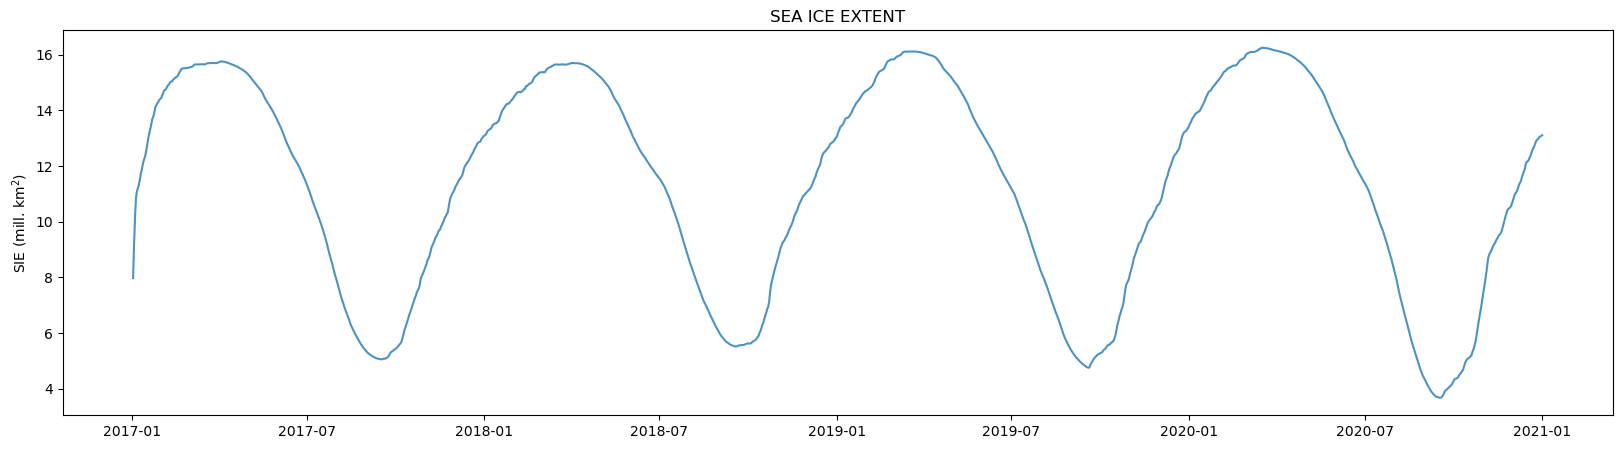

In [21]:
plt.figure(figsize=(20,5))
ax = plt.subplot()
ax.plot(ds["time_counter"], sie_plot/10**12, '-', alpha=0.8)
ax.set_title("SEA ICE EXTENT")
ax.set_ylabel("SIE (mill. km$^2$)")
#ax.set_xlabel("Time")
plt.show()

In [9]:
sia_plot = sea_ice_area(ds, ds_grid, "n")

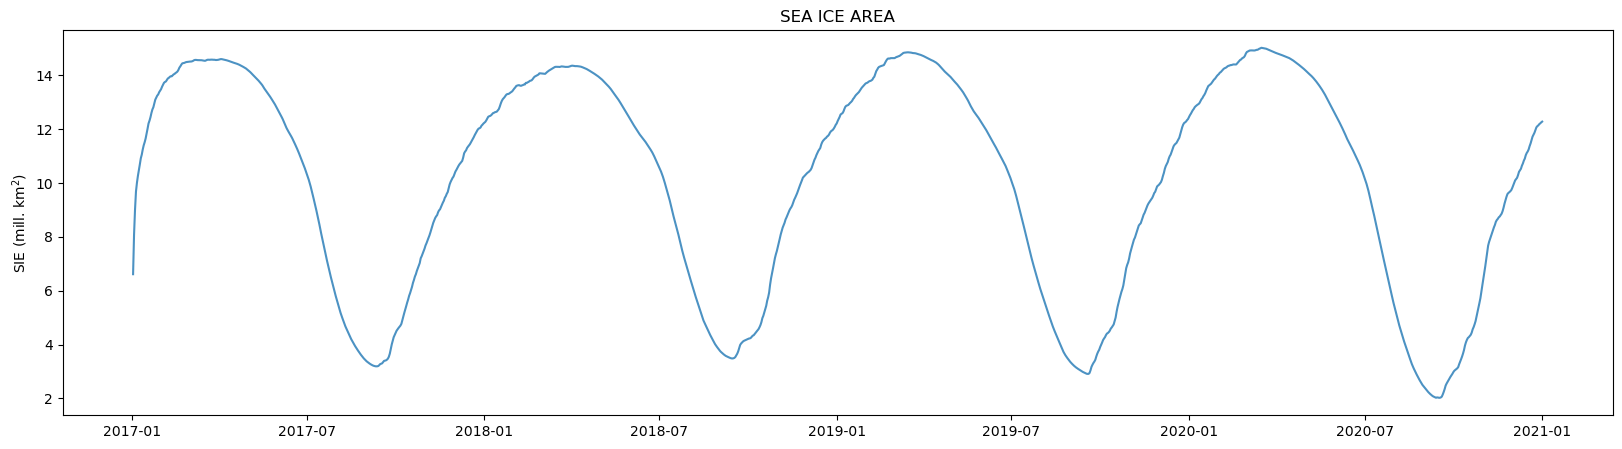

In [26]:
plt.figure(figsize=(20,5))
ax = plt.subplot()
ax.plot(ds["time_counter"], sia_plot/10**12, '-', alpha=0.8)
ax.set_title("SEA ICE AREA")
ax.set_ylabel("SIE (mill. km$^2$)")
plt.show()

In [11]:
sit_plot = sea_ice_thickness(ds, ds_grid, "n")

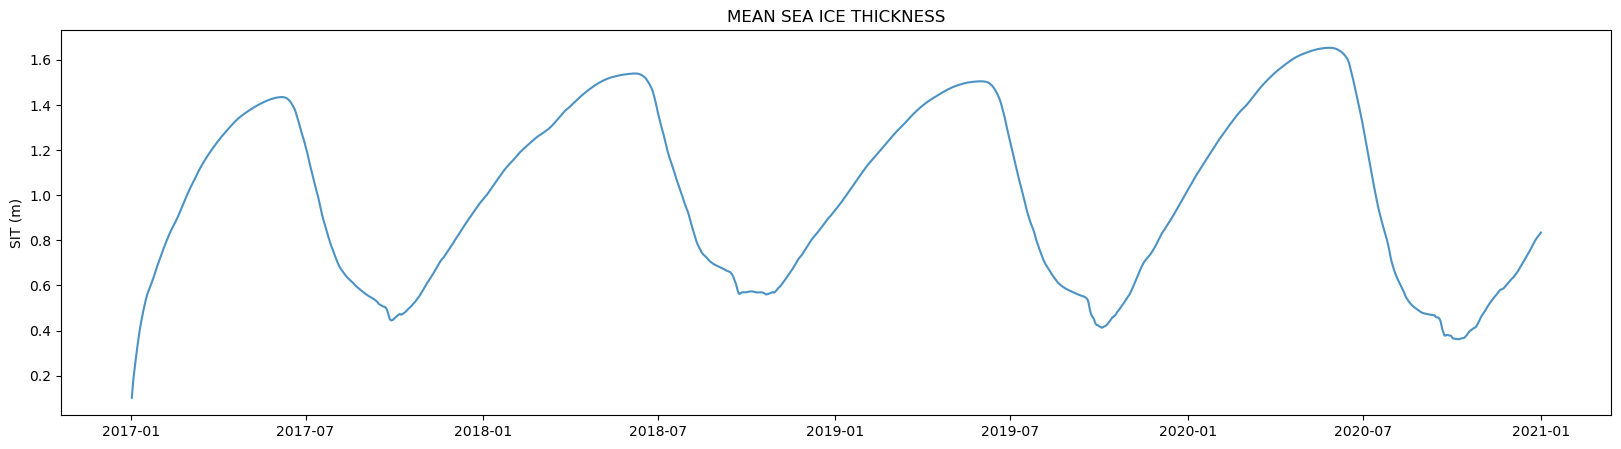

In [27]:
plt.figure(figsize=(20,5))
ax = plt.subplot()
ax.plot(ds["time_counter"], sit_plot, '-', alpha=0.8)
ax.set_title("MEAN SEA ICE THICKNESS")
ax.set_ylabel("SIT (m)")
plt.show()

In [13]:
snow_plot = snow_thickness(ds, ds_grid, "n")

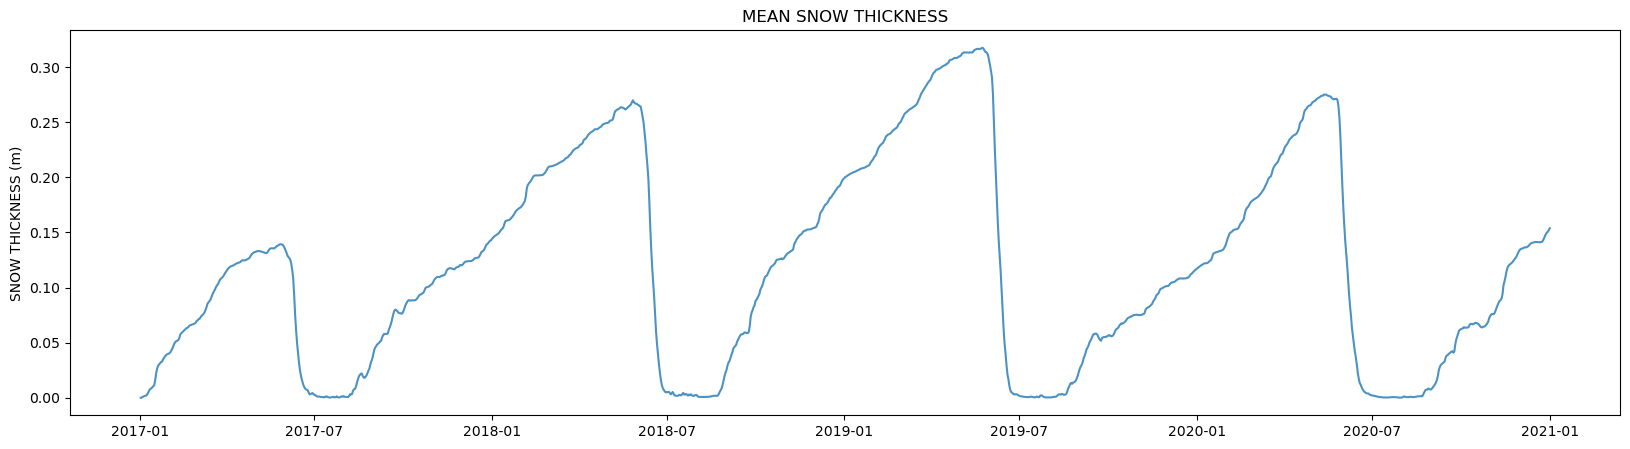

In [28]:
plt.figure(figsize=(20,5))
ax = plt.subplot()
ax.plot(ds["time_counter"], snow_plot, '-', alpha=0.8)
ax.set_title("MEAN SNOW THICKNESS")
ax.set_ylabel("SNOW THICKNESS (m)")
plt.show()